In [1]:
# importing all necessary libraries for now
import numpy as np
import pandas as pd
import seaborn as snr
import matplotlib.pyplot as plt

In [2]:
# to upload the datasheet in variable with help of pandas
data = pd.read_excel("C:/Users/Darsh/loan-predictionUC.csv (1).xlsx")

In [3]:
# to get first few rows of dataset with colnames
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#to find dimension of dataset
data.shape

(614, 13)

In [5]:
# to remove unwanted columns
data = data.drop('Loan_ID', axis=1)

In [6]:
# to find distinct values in columns
#print(data['Gender'].unique())
#print(data['Married'].unique())
#print(data['Dependents'].unique()) .... etc or in short:
for i in data.columns:
    print(data['{}'.format(i)].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
[0 1 2 '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  223

In [7]:
# to change values in a column
data['Dependents'] = data['Dependents'].apply({0:0,1:1,2:2,'3+':4}.get)
data['Property_Area'] = data['Property_Area'].apply({'Urban' : 'Urban','Rural' : 'Rural', 'Semiurban' : 'Semi urban', 
                                                     'semiurban' : 'Semi urban', 'Semi-urban' : 'Semi urban'}.get)

In [8]:
#since there are nan values we need to summarize them, lets count how many there are in each col:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# to check null info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [10]:
# now we will fill nan values as we cant delete rows due to huge amount of nan values in a single cell:
#data['Gender'] = data['Gender'].fillna(data['Gender'].mode())
#data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['LoanAmount'].mean()) .... or in short:
data = data.fillna({
    'Gender':data['Gender'].dropna().mode().values[0],
    'Married':data['Married'].dropna().mode().values[0],
    'Dependents':data['Dependents'].dropna().mode().values[0],
    'Self_Employed':data['Self_Employed'].dropna().mode().values[0],
    'LoanAmount':data['LoanAmount'].dropna().mean(),
    'Loan_Amount_Term':data['Loan_Amount_Term'].dropna().mode().values[0],
    'Credit_History':data['Credit_History'].dropna().mode().values[0],
})

In [11]:
# checking null values are filled and replaced
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [12]:
# now changing remaining values after filling null values
data['Gender'] = data['Gender'].apply({'Male' : 1, 'Female' : 0}.get)
data['Married'] = data['Married'].apply({'Yes' : 1, 'No' : 0}.get)
data['Education'] = data['Education'].apply({'Graduate' : 1, 'Not Graduate' : 0}.get)
data['Self_Employed'] = data['Self_Employed'].apply({'Yes' : 1, 'No' : 0}.get)
data['Property_Area'] = data['Property_Area'].apply({'Urban' : 1, 'Rural' : 2, 'Semi urban' : 3}.get)
data['Loan_Status'] = data['Loan_Status'].apply({'Y' : 1, 'N' : 0}.get)

In [13]:
# now importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [14]:
# divinding the data into dependent and independent columnes for classification
# x= data[['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area']] or in short:
x = data.drop(['Loan_Status'],axis =1)
y = data['Loan_Status']

In [15]:
# splitting the data into training data and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=3)

In [16]:
# importing the Random forest classifier algorithm to train this model
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier()

In [17]:
# fitting the training x and y values in algorithm for training model
forest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
# predicting the training dataset and testing dataset
forest_train_predictions = forest_classifier.predict(x_train)
forest_test_predictions = forest_classifier.predict(x_test)

In [19]:
# importing confusion_matrix and accuracy_score modules so as to get confusion matrix and accuracy of model we created
# by comparing original values of dataset with ML model predicted values of dataset
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_train,forest_train_predictions)
cm2 = confusion_matrix(y_test,forest_test_predictions)
ac1 = accuracy_score(y_train,forest_train_predictions)
ac2 = accuracy_score(y_test,forest_test_predictions)

In [20]:
# to see accuracy of train and test datasets
print(f'Accuracy for train dataset and test dataset is {ac1} and {ac2} respectively')

Accuracy for train dataset and test dataset is 1.0 and 0.8536585365853658 respectively


In [21]:
# to see confusion matrix of train and test datasets
print(f'Confusion Matrix for train dataset is:\n{cm1}\n\nConfusion Matrix for test dataset is:\n{cm2}')

Confusion Matrix for train dataset is:
[[164   0]
 [  0 327]]

Confusion Matrix for test dataset is:
[[13 15]
 [ 3 92]]


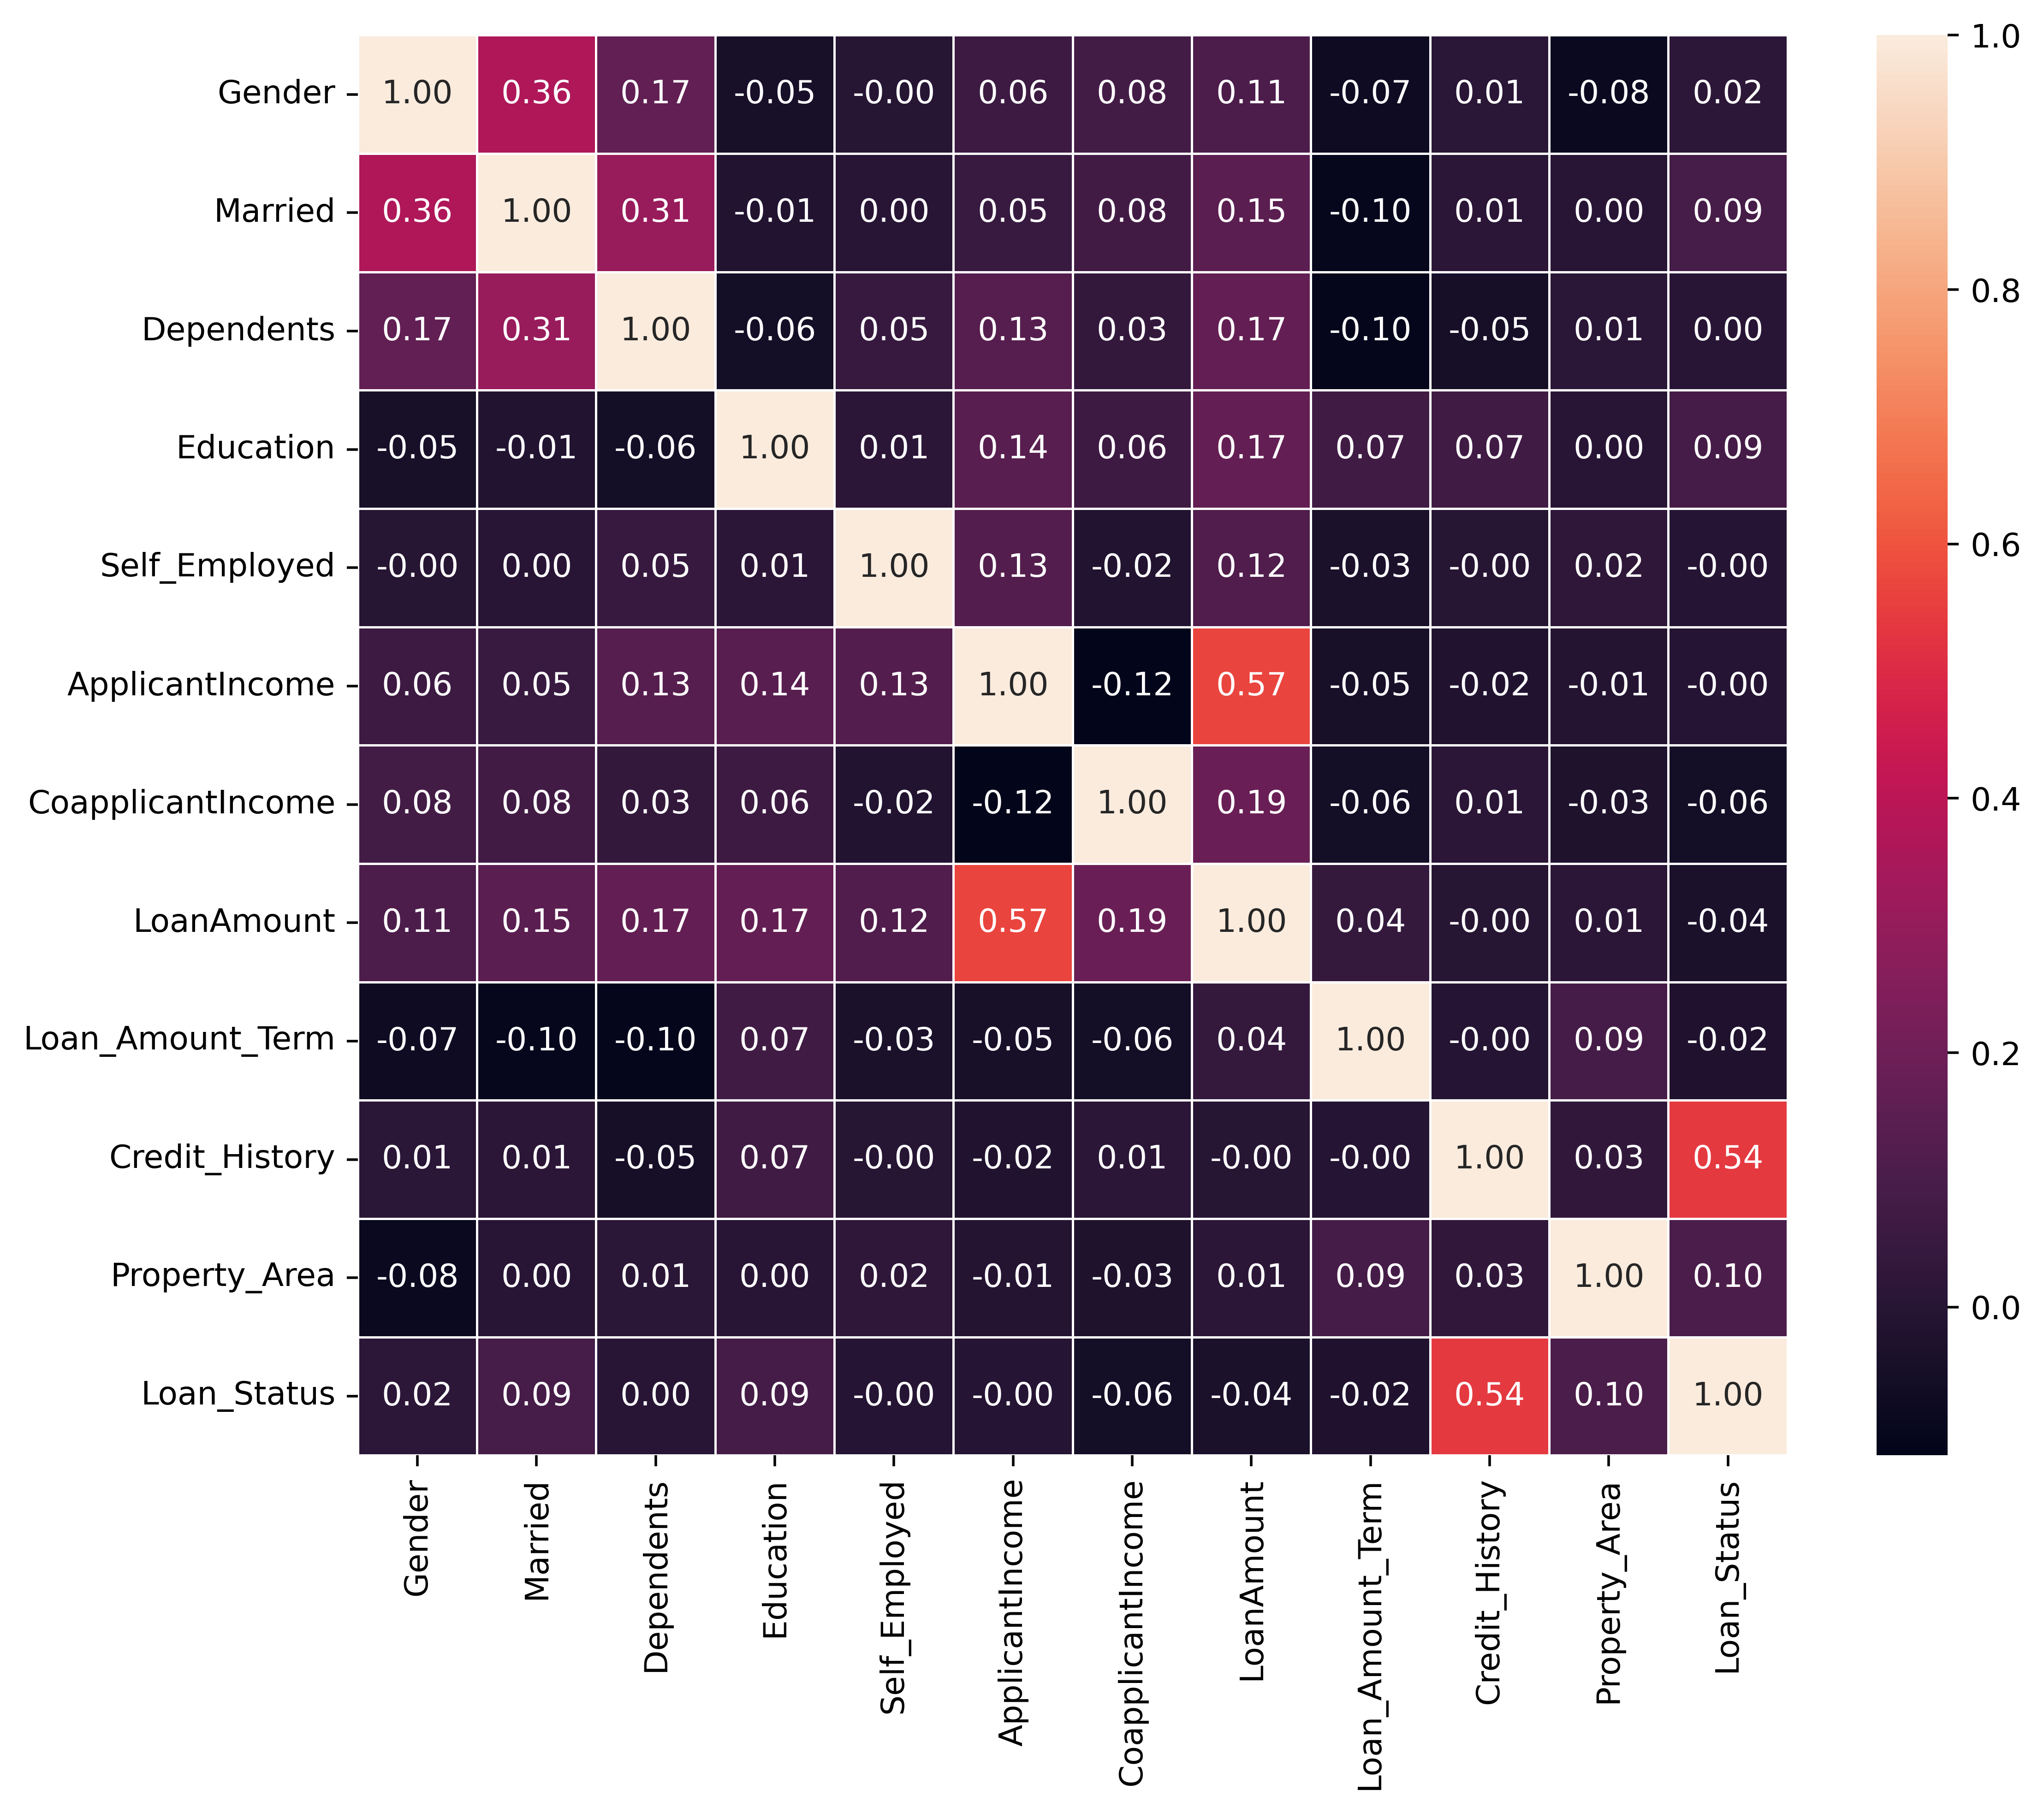

In [22]:
# to plot a heatmap from seaborn to show correlation of columns with each other.
plt.figure(figsize=(10,8), dpi =500)
snr.heatmap(data.corr(),annot=True,fmt=".2f", linewidth=.5)
plt.show()

# Conclusion

On the basis of this heatmap and its correalation, we can conclude following things:
1. Talking about loan amount which can be sanctioned, it is dependent hugely on applicant's & coapplicant's income.
2. Dependents are quite related to Married and Gender.
3. Now coming to Loan Status:
    1. It is highly correlated with Credit History, meaning customers with good credit history has got better chance for approval for loans.
    2. It is also greatly dependent on Property Area, as if the area is good then the value of collateral will be good in exchange of secuirity of loan for bank.
    3. It is also greatly dependent on Education, as without education one might have less tendency to get a job in case unemployness, so he/she won't be able to pay the loan. It can also be observed in correlation of education and applicant's income/loan amount.
    4. It is also greatly dependent on Married life, as there are many benefits for a couple when applying a loan.